In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import random
import seaborn as sns
import math
import re
import plotly.express as px
%matplotlib inline
from sklearn import metrics
from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve,classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, f1_score
from sklearn.feature_selection import SelectKBest, f_regression,mutual_info_regression
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [2]:
#from pandas_profiling import ProfileReport

In [3]:
df = pd.read_csv('heart.csv')

In [4]:
#profile = ProfileReport(df, title="Heart Disease Profiling Report")

In [5]:
#profile

In [6]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [7]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [8]:
df.columns = ['Age', 'Gender', 'Chest_Pain', 'Resting_Blood_Pressure', 'Serum_Cholesterol', 'Fasting_Blood_Sugar', 'Resting_ECG', 'Max_Heart_Rate_Achivied',
       'Exercise_Indused_Angina', 'Oldpeak', 'Slope', 'Major_Vessels', 'Thalassemia', 'Target']


In [9]:
df.nunique()

Age                         41
Gender                       2
Chest_Pain                   4
Resting_Blood_Pressure      49
Serum_Cholesterol          152
Fasting_Blood_Sugar          2
Resting_ECG                  3
Max_Heart_Rate_Achivied     91
Exercise_Indused_Angina      2
Oldpeak                     40
Slope                        3
Major_Vessels                5
Thalassemia                  4
Target                       2
dtype: int64

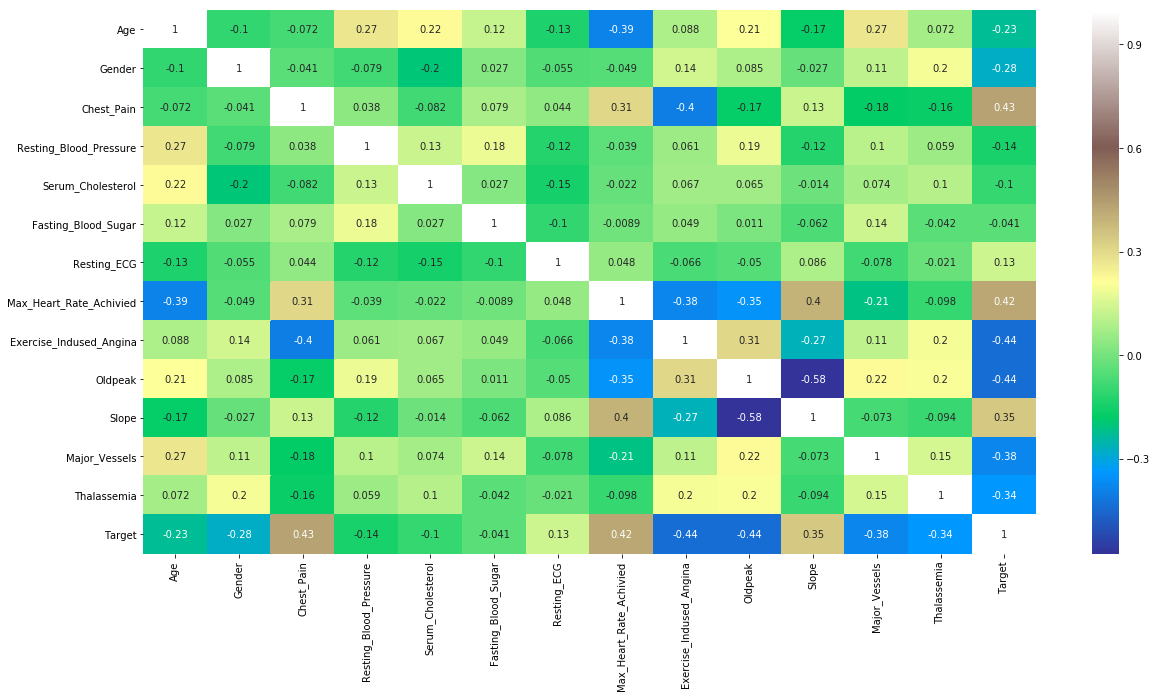

In [10]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), annot=True, cmap='terrain')

/Users/AMINO/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5, 1.0, 'Resting Blood Pressure vs Serum Cholesterol')

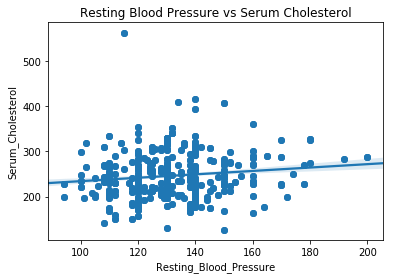

In [11]:
sns.regplot(x=df.Resting_Blood_Pressure,y=df.Serum_Cholesterol)
plt.title('Resting Blood Pressure vs Serum Cholesterol')

High blood pressure is a systolic pressure of 130 or higher and below 130 is considred normal

In [12]:
blood_pressure_level=[]
for i in df['Resting_Blood_Pressure']:
    if (i > 130):
        blood_pressure_level.append(1) #High Blood Pressure
    else:
        blood_pressure_level.append(0) #Normal

In [13]:
df['Blood_Pressure_Level'] = blood_pressure_level

In [14]:
df['Blood_Pressure_Level'] = blood_pressure_level

Chest Pain Types: 
0 = typical angina, 1 = atypical angina, 2 = non-anginal pain, 3 = asymptomatic 

In [15]:
Chest_Pain_type=[]
for i in df['Chest_Pain']:
    if i == 0:
        Chest_Pain_type.append('Typical Angina')
    elif i == 1:
        Chest_Pain_type.append('Atypical Angina')
    elif i == 2:
        Chest_Pain_type.append('Non-Anginal')
    elif i == 3:
        Chest_Pain_type.append('Asymptomatic')

In [16]:
df['Chest_Pain_Type'] = Chest_Pain_type

We are going sepreate age groups

In [17]:
age_groups=[]
for i in df['Age']:
    if (i >= 29) & (i < 40):
        age_groups.append(0)
    elif (i >= 40)&(i < 55):
        age_groups.append(1)
    else:
        age_groups.append(2)
df['Age-Group'] = age_groups

In [18]:
df.columns

Index(['Age', 'Gender', 'Chest_Pain', 'Resting_Blood_Pressure',
       'Serum_Cholesterol', 'Fasting_Blood_Sugar', 'Resting_ECG',
       'Max_Heart_Rate_Achivied', 'Exercise_Indused_Angina', 'Oldpeak',
       'Slope', 'Major_Vessels', 'Thalassemia', 'Target',
       'Blood_Pressure_Level', 'Chest_Pain_Type', 'Age-Group'],
      dtype='object')

In [19]:
df.shape

(1025, 17)

In [20]:
heart_health=[]
for i in df['Target']:
    if i == 0:
        heart_health.append('Healthy Heart')
    elif i == 1:
        heart_health.append('Heart Disease')

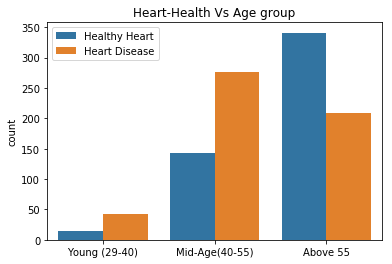

In [21]:
plt.title("Heart-Health Vs Age group")
ax = sns.countplot(x=age_groups,hue=heart_health)
ax.set_xticklabels(['Young (29-40)','Mid-Age(40-55)','Above 55']);

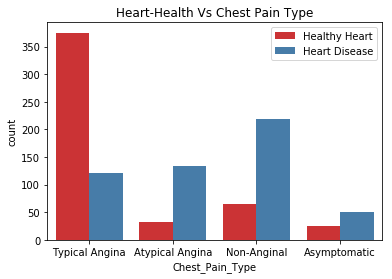

In [22]:
plt.title("Heart-Health Vs Chest Pain Type")
    
ax = sns.countplot(x='Chest_Pain_Type',hue=heart_health,data=df,palette='Set1')

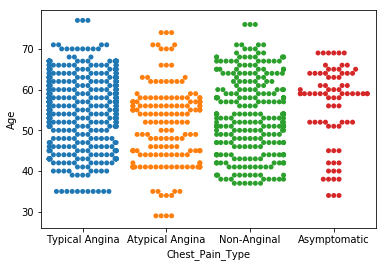

In [23]:
sns.swarmplot(data = df , x = "Chest_Pain_Type" , y = "Age")
plt.show()

In [24]:
df.nunique()

Age                         41
Gender                       2
Chest_Pain                   4
Resting_Blood_Pressure      49
Serum_Cholesterol          152
Fasting_Blood_Sugar          2
Resting_ECG                  3
Max_Heart_Rate_Achivied     91
Exercise_Indused_Angina      2
Oldpeak                     40
Slope                        3
Major_Vessels                5
Thalassemia                  4
Target                       2
Blood_Pressure_Level         2
Chest_Pain_Type              4
Age-Group                    3
dtype: int64

Healthy serum cholesterol is less than 200 mg/dL

In [25]:
serum_chol_level=[]
for i in df['Serum_Cholesterol']:
    if i > 200:
        serum_chol_level.append(1) #Not Healthy Cholesterol
    else:
        serum_chol_level.append(0) #Healthy Cholesterol

In [26]:
df['Serum_Cholesterol_Level'] = serum_chol_level

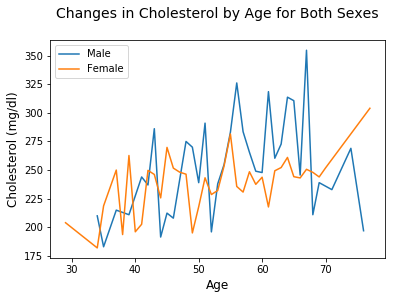

In [27]:
sns.lineplot(x='Age', y='Serum_Cholesterol', hue='Gender', data=df, ci=None)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Cholesterol (mg/dl)', fontsize=12)
plt.title('Changes in Cholesterol by Age for Both Sexes\n', fontsize=14)
plt.legend(['Male', 'Female']);

We can say, based on this data, that both tend to have increase blood cholesterol levels with increases in age

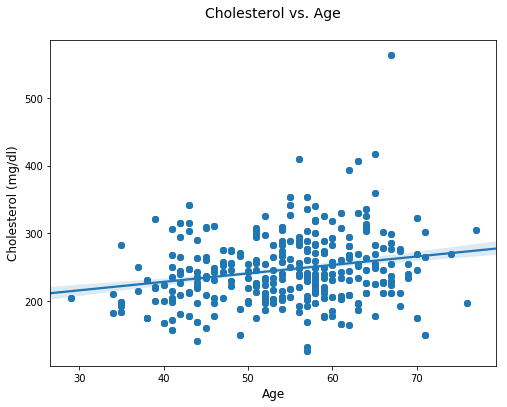

In [28]:
plt.figure(figsize=(8,6))
p = sns.regplot('Age', 'Serum_Cholesterol', data=df)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Cholesterol (mg/dl)', fontsize=12)
plt.title('Cholesterol vs. Age\n', fontsize=14);

slightly positive relationship between age and cholesterol

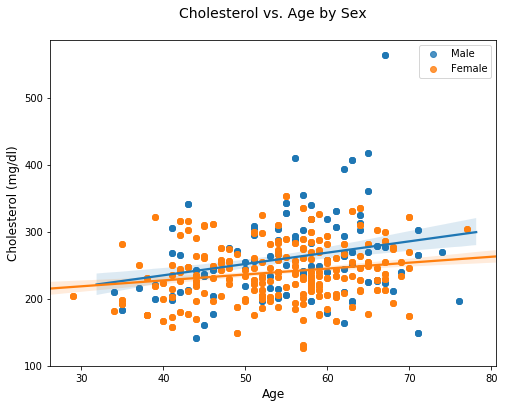

In [29]:
plt.figure(figsize=(8,6))
sns.regplot('Age', 'Serum_Cholesterol', data=df[df.Gender == 0], label='Male')
sns.regplot('Age', 'Serum_Cholesterol', data=df[df.Gender == 1], label='Female')
plt.xlabel('Age', fontsize=12)
plt.ylabel('Cholesterol (mg/dl)', fontsize=12)
plt.title('Cholesterol vs. Age by Sex\n', fontsize=14)
plt.legend();

there tends to be more of an increase in cholesterol levels as age increases for males compared to females.

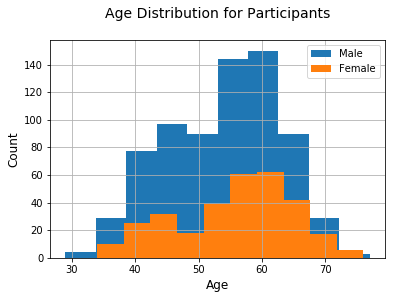

In [30]:
df[df['Gender'] == 1].Age.hist(label='Male')
df[df['Gender'] == 0].Age.hist(label='Female')
plt.xlabel('Age', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Age Distribution for Participants\n', fontsize=14)
plt.legend();

### Splitting the data into train and test split

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
X = df.drop(['Target', 'Chest_Pain_Type'],axis = 1)

In [33]:
y = df['Target']

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 0)

In [35]:
print(y_train.shape)
print(y_test.shape)

(820,)
(205,)


In [36]:
print(X_train.shape)
print(X_test.shape)

(820, 16)
(205, 16)


### Scaling the features

In [37]:
from sklearn.preprocessing import StandardScaler

In [38]:
#scaler = StandardScaler()
#scaler.fit(x_train)
#x_train_s = pd.DataFrame(scaler.transform(x_train),columns=x_train.columns)
#x_test_s = pd.DataFrame(scaler.transform(x_test),columns=x_test.columns)
#x_train_s

In [39]:
#scaler = StandardScaler()
#X_train = scaler.fit_transform(X_train)
#X_test = scaler.transform(X_test)

In [40]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

scaler = StandardScaler()  
scaler.fit(X_train)

X_train = scaler.transform(X_train)  
X_test = scaler.transform(X_test)

/Users/AMINO/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/AMINO/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  import sys
/Users/AMINO/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  


In [41]:
#from statsmodels.stats.outliers_influence import variance_inflation_factor

#viffactor = [variance_inflation_factor(x_train_s.values, i) for i in range(x_train_s.shape[1])]

#vif = pd.DataFrame()
#vif["VIF Factor"] = viffactor
##[variance_inflation_factor(df_features.values, i) for i in range(df_features.shape[1])]
#vif["features"] = x_train_s.columns
#vif.round(1).sort_values("VIF Factor",ascending=False)
#vif

In [42]:
#from sklearn.linear_model import LogisticRegression
#logreg = LogisticRegression(C=1e9)
#logreg.fit(x_train, y_train)
#log_pred = logreg.predict(x_test_s)

### Using KNN Model

In [43]:
from sklearn.neighbors import KNeighborsClassifier

Minimum error:- 0.0 at K = 0


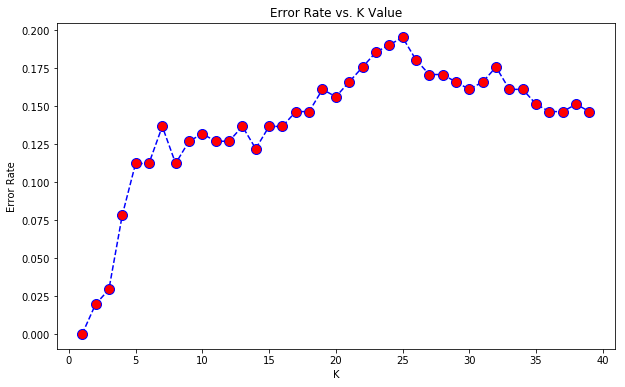

In [44]:
error_rate = []
for i in range(1,40):
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(X_train,y_train)
 pred_i = knn.predict(X_test)
 error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate)))

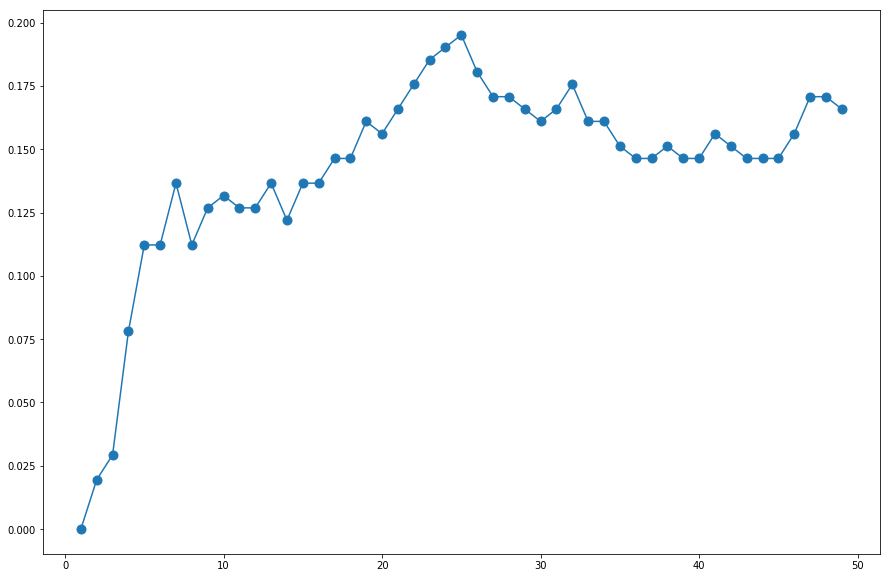

In [45]:
error_rate = []

for i in range(1,50):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred = knn.predict(X_test)
    error_rate.append(np.mean(pred != y_test))

plt.figure(figsize=(15,10))
plt.plot(range(1,50),error_rate, marker='o', markersize=9)

Maximum accuracy:- 1.0 at K = 0


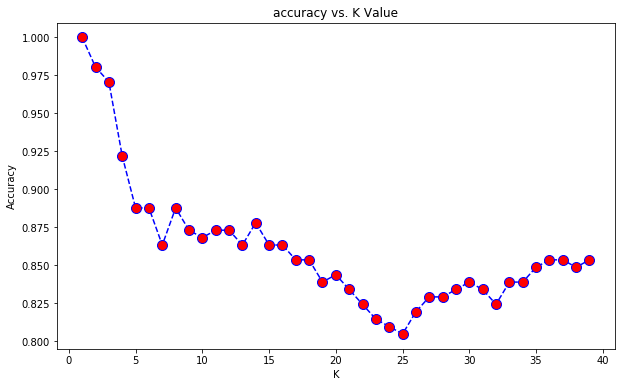

In [46]:
acc = []
# Will take some time
from sklearn import metrics
for i in range(1,40):
    neigh = KNeighborsClassifier(n_neighbors = i).fit(X_train,y_train)
    yhat = neigh.predict(X_test)
    acc.append(metrics.accuracy_score(y_test, yhat))
    
plt.figure(figsize=(10,6))
plt.plot(range(1,40),acc,color = 'blue',linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('accuracy vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
print("Maximum accuracy:-",max(acc),"at K =",acc.index(max(acc)))

In [101]:
knn = KNeighborsClassifier(n_neighbors = 4)

In [102]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=4, p=2,
           weights='uniform')

In [103]:
knn_predicted = knn.predict(X_test)

In [104]:
knn_acc_score = accuracy_score(y_test, knn_predicted)

In [105]:
knn_predicted

array([1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 1])

In [106]:
knn_acc_score

0.9219512195121952

In [107]:
y_pred_class = knn.predict(X_test)

In [108]:
print('Accuracy:' + str(metrics.accuracy_score(y_test, y_pred_class)))

Accuracy:0.9219512195121952


In [122]:
knn_y_pred_class = knn.predict(X_test)

In [123]:
print(metrics.recall_score(y_test, knn_y_pred_class))

0.9626168224299065


In [118]:
model_1 = 'K-NeighborsClassifier'
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train, y_train)
knn_predicted = knn.predict(X_test)
knn_conf_matrix = confusion_matrix(y_test, knn_predicted)
knn_acc_score = accuracy_score(y_test, knn_predicted)

In [119]:
print("confussion matrix")
print(knn_conf_matrix)

confussion matrix
[[ 98   0]
 [  4 103]]


In [120]:
print("Accuracy of K-NeighborsClassifier:",knn_acc_score*100,'\n')

Accuracy of K-NeighborsClassifier: 98.04878048780488 



In [121]:
print(classification_report(y_test,knn_predicted))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        98
           1       1.00      0.96      0.98       107

   micro avg       0.98      0.98      0.98       205
   macro avg       0.98      0.98      0.98       205
weighted avg       0.98      0.98      0.98       205



### Random Forest Classifier

In [60]:
from sklearn.ensemble import RandomForestClassifier

In [61]:
rfc = RandomForestClassifier(n_estimators = 50, max_depth = 3)

In [62]:
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=3, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [63]:
rfc_predicted = rfc.predict(X_test)

In [64]:
rfc_acc_score = accuracy_score(y_test, rfc_predicted)

In [65]:
rfc_predicted

array([1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1])

In [66]:
rfc_acc_score

0.9073170731707317

In [93]:
model_2 = 'Random Forest Classfier'
rfc = RandomForestClassifier(n_estimators=20, random_state=12,max_depth=5)
rfc.fit(X_train,y_train)
rfc_predicted = rfc.predict(X_test)
rfc_conf_matrix = confusion_matrix(y_test, rfc_predicted)
rfc_acc_score = accuracy_score(y_test, rfc_predicted)

In [94]:
print("confussion matrix")
print(rfc_conf_matrix)

confussion matrix
[[ 87  11]
 [  1 106]]


In [95]:
print("Accuracy of Random Forest:",rfc_acc_score*100,'\n')
print(classification_report(y_test,rfc_predicted))

Accuracy of Random Forest: 94.14634146341463 

              precision    recall  f1-score   support

           0       0.99      0.89      0.94        98
           1       0.91      0.99      0.95       107

   micro avg       0.94      0.94      0.94       205
   macro avg       0.95      0.94      0.94       205
weighted avg       0.95      0.94      0.94       205



### Logistic Regression

In [68]:
from sklearn.linear_model import LogisticRegression

In [69]:
from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve,classification_report

In [70]:
lr = LogisticRegression()

In [71]:
lr.fit(X_train,y_train)

/Users/AMINO/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [72]:
lr_predict = lr.predict(X_test)

In [73]:
lr_acc_score = accuracy_score(y_test, lr_predict)

In [74]:
lr_predict

array([1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1])

In [75]:
lr_acc_score

0.8682926829268293

In [90]:
model_3 = 'Logistic Regression'
lr = LogisticRegression()
model = lr.fit(X_train, y_train)
lr_predict = lr.predict(X_test)
lr_conf_matrix = confusion_matrix(y_test, lr_predict)
lr_acc_score = accuracy_score(y_test, lr_predict)

/Users/AMINO/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [91]:
print("confussion matrix")
print(lr_conf_matrix)

confussion matrix
[[ 77  21]
 [  6 101]]


In [92]:
print("Accuracy of Logistic Regression:",lr_acc_score*100,'\n')
print(classification_report(y_test,lr_predict))

Accuracy of Logistic Regression: 86.82926829268293 

              precision    recall  f1-score   support

           0       0.93      0.79      0.85        98
           1       0.83      0.94      0.88       107

   micro avg       0.87      0.87      0.87       205
   macro avg       0.88      0.86      0.87       205
weighted avg       0.88      0.87      0.87       205



In [77]:
lr_y_pred_class = lr.predict(X_test)

In [78]:
print(metrics.recall_score(y_test, lr_y_pred_class))

0.9439252336448598


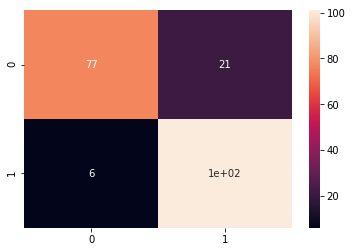

In [79]:
cm = confusion_matrix(y_test,lr_predict)
sns.heatmap(cm,annot=True);

###  Decision Tree Classifier

In [80]:
from sklearn.tree import DecisionTreeClassifier

In [86]:
model_4 = 'DecisionTreeClassifier'
dt = DecisionTreeClassifier(criterion = 'entropy',random_state=0,max_depth = 6)
dt.fit(X_train, y_train)
dt_predicted = dt.predict(X_test)
dt_conf_matrix = confusion_matrix(y_test, dt_predicted)
dt_acc_score = accuracy_score(y_test, dt_predicted)

In [87]:
print("confussion matrix")
print(dt_conf_matrix)

confussion matrix
[[95  3]
 [ 8 99]]


In [83]:
print("Accuracy of DecisionTreeClassifier:",dt_acc_score*100,'\n')

Accuracy of DecisionTreeClassifier: 94.6341463414634 



In [84]:
print(classification_report(y_test,dt_predicted))

              precision    recall  f1-score   support

           0       0.92      0.97      0.95        98
           1       0.97      0.93      0.95       107

   micro avg       0.95      0.95      0.95       205
   macro avg       0.95      0.95      0.95       205
weighted avg       0.95      0.95      0.95       205

